# **Modelling bacterial adaptation to antibiotics with the staircase model**

**Authors**: Schenkel, Hilke (4840399) & Tapia Chaca, Franz (5489563)

**For**: Completion of MSc Nanobiology course NB4050 'Modelling in Dynamical Systems'

Thursday, 4th November, 2021

**Please open this notebook and run the code on Google Colabs. Given all of our imported functions, the visualisation function works perfectly there, but not on Jupyter notebooks.**



# **Introduction**
---

Bacteria are responsible for many diseases in the world. For example, cholera, which affects more than 1.3M people a year with 20-140 thousand die as a result, is caused by *Vibrio cholerae* **[4]**. Fortunately, antibiotics have been developed that can kill bacteria. However, bacteria have adapted to develop resistance to these antibiotics, rendering them obsolete. In the past few decades, antibiotic resistance has grown and spread worldwide and continues to affect lives. A 2019 report states that in the United States, more than 2.8M infections occur due to resistant bacteria, and more than 35 thousand deaths subsequently occur **[5]**. Some bacterial species are notoriously resistant to antibiotics, having acquired resistance to almost all, if not all, the antibiotics used to tackle them today. *Neisseria gonorrhoeae* is one such example **[6]**. It is widely known that bacteria grow resistant to antibiotics, but how they do so is still unclear **[1,7]**. Many factors are likely involved in the development of resistance. To help bridge this knowledge gap, a research group from the University of Illinois sought to investigate how one factor, spatial heterogeneity of antibiotic concentration, could promote rapid evolution of antibiotic resistance **[1]**. They created a 'staircase' model, which is built on the kinetic Monte Carlo algorithm. For this project, we sought to implement the staircase model and apply it to predict how a bacteria could develop antibiotic resistance. We built the staircase model largely independently from the published research paper and observed the effects on bacteria population dynamics due to different migration modes and varying mutation rates.


### *The staircase model*

The staircase model is used to investigate how spatial heterogeneity of antibiotic concentration could promote rapid evolution of antibiotic resistance. Spatial heterogeneity is explained by the following. In a petri-dish, antibiotic concentration is homogeneous, and every bacterium is affected by that one concentration. At a low concentration, bacteria can proliferate, but at a high concentration, they will die. Thus, bacteria can only live and evolve in a narrow concentration range. As a homogeneous environment has no range, bacteria could only evolve if the environment falls within that favourable range, which can be unlikely. Thus, rapid resistance evolution in such a homogeneous environment is also unlikely.

However, bacterial environments such as the human body are not homogeneous in antibiotic concentration. Antibiotic concentration can vary widely among tissues and organs **[1]**, and bacteria can migrate between these different spaces. In this heterogeneous antibiotic environment, there may be compartments with the suitable antibiotic concentrations that do not inhibit bacterial proliferation. These compartments act as 'safe havens' for bacteria to grow and, by chance, acquire resistance to higher antibiotic concentrations. Once evolved, these mutant bacteria could migrate to higher concentration compartments, wherein they can now grow. Evolving resistance to higher antibiotic concentration is advantageous for bacteria. In such compartments, there are fewer bacteria to compete with, so the mutant species can proliferate and probably mutate again to grow in the more concentrated compartment. Thus, bacteria that develop higher resistance to antibiotics could climb the antibiotic gradient in a step-wise fashion. Due to this step-wise climbing behaviour of antibiotic resistance, the model produced is called the staircase model. The model is shown below and explained after.

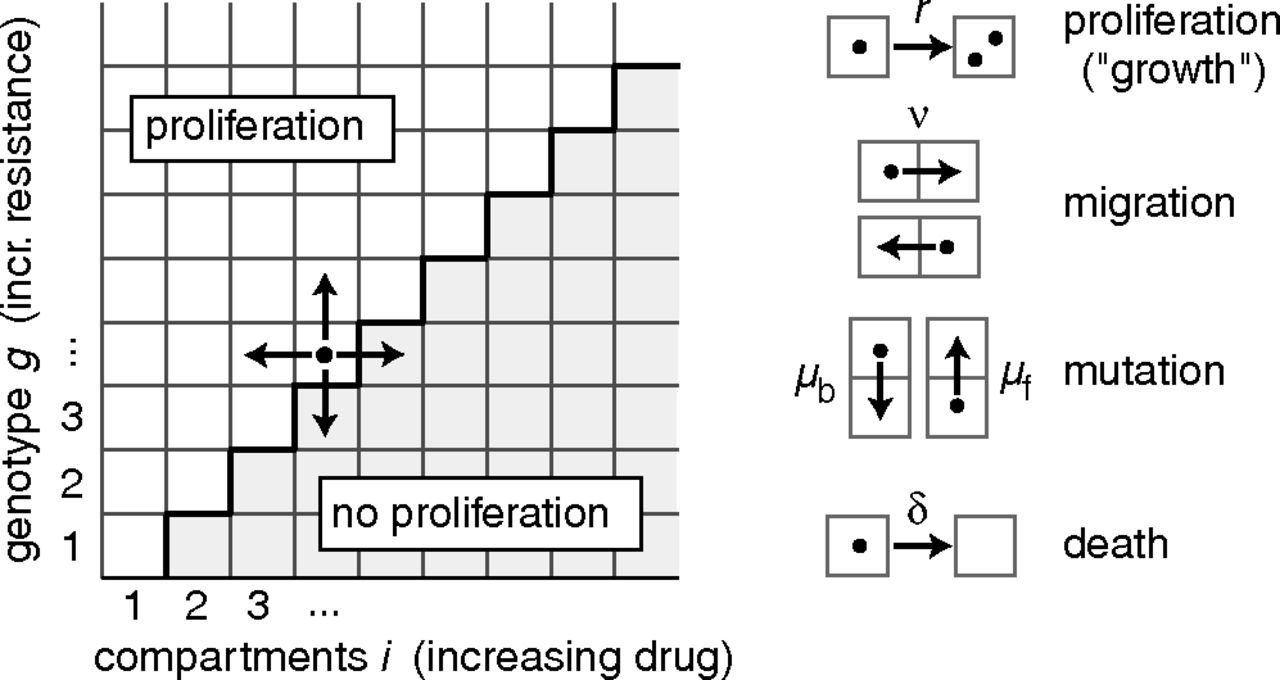

Now to go into more detail on the staircase model itself. However, before we go in depth, it is important to understand the graphical interpretation of the model. An example of such a visualisation is shown in the image above from Hermsen et al. **[1]**. On the horizontal axis, we have the physical compartments. These are spatially distinct from each other. Each of these compartments has a distinct antibiotic concentration, increasing in concentration from left to right. On the vertical axis, the different genotypes of the bacterial populations are given. These genotypes confer antibiotic resistance to the antibiotic concentration in compartments with the same or a smaller index as the index of the genotype in question (g>=i). Bacteria can only grow in compartments where they are resistant. This is done to simulate the presence of the antibiotics. 

A crucial aspect to note about the model and the visualisation is that, in principle, this model is a 1D problem with only the compartments being a physical entity. As such, the population of a single compartment is the sum of all genotypes found in that compartment, that is, the sum of a column in the visualisation.

The staircase model is fully probabilistic. For each bacteria, five events can stochastically occur, as can be seen in the figure above. The five events are the following:


1.   Proliferation or growth. The bacterial growth is modelled by logistic growth. This is done to simulate competition between genotypes in the same compartment but not between different compartments. Also, this implicitly creates a selection pressure for evolution, as evolved colonies can migrate to less populated compartments and as have space to grow and migrate more. Each compartment has a carrying capacity **K** and a total population **N**. The total population of a compartment is the sum over all genotypes in that compartment, i.e., the sum over a column. In addition, due to the presence of antibiotics, a genotype **g** can only grow in compartment **i** if **g >= i**. The logistics growth is given by the equation shown below.
2.   Migration to neighbouring compartments.
3.   Forward mutation. In other words, gaining antibiotic resistance.
4.   Backward mutation. In other words, losing antibiotic resistance.
5.   Cell death.

Each of these events is represented by a rate given in units of per cells per hour.



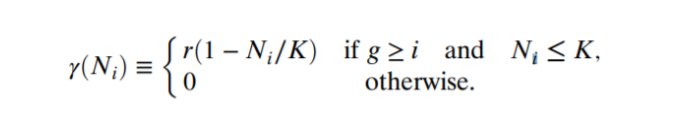

### *The kinetic Monte Carlo algorithm*

The staircase model is simulated by a kinetic Monte Carlo algorithm **[1]**. In our study, we have seen and studied standard Monte Carlo models. However, the Kinetic Monte Carlo model was entirely new for us. 

This kinetic model is a variant of the standard Monte Carlo model in that it iterates over objects and probabilistically chooses which event will happen for that object. The defining feature of the Kinetic Monte Carlo model is that the time step (dt) in a simulation is variable. It is, in fact, stochastically dependent on the rates of the processes simulated, taken from the Poisson distribution given by the rates. 

This variable time step feature of the kinetic model is advantageous when simulating time evolution processes that are found in nature, such as surface diffusion. The advantage lies in the fact the kinetic model can provide a realistic and correct time scale for the evolution of the system. This is not always the case when using the standard Monte Carlo model, as here, the step size is usually defined by the user and the rates of the ongoing processes.

Besides being more realistic, the variable time step also has a physical meaning. The variable time step can be interpreted as the time interval where no event will take place. In terms of cells, this can be interpreted as a rest period for cells, such as the interphase in the cell cycle. Of course, this resting time is stochastic for different cells. As such, the time step should indeed be variable as well.

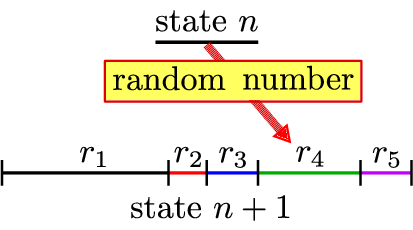

The kinetic Monte Carlo algorithm goes as follows:


1.   There is an initial state and multiple possible final states. In the case of our model, there are 5 final states.
2.   Each transition from the initial state to the final state has its own rate constant **r**.
3.   All rates for possible transitions are added to gain the total rate **r_tot**, as seen in the figure above. 
4.   A random number is drawn between 0 and 1 and is then multiplied by the total rate. The modulated result will fall somewhere in the line of rates.
5.   This modulated probability is compared to the line of added probabilities; see the red arrow in the figure. The location on the line will give which event will occur.
6.   The specific event occurs.
7.   A time interval is defined for which no event occurs. This is the time step **dt**, dt = (1/r_tot)*ln(1/u), 0 < u < 1, where u is a random number. This time step is drawn from the Poisson distribution given by the rates and can vary per run.


The image above from Makiela and Maska **[8]** shows the backbone of the kinetic Monte Carlo model and gives an excellent visual representation of the algorithm discussed above.

### *Our adaptation*

In the paper by Hermsen et al **[1]**, the model itself is not given, so we have made our own adaptation of the model based on the information given in the article as well as on the theory about kinetic Monte Carlo models. As a result, our model may vary in some ways from the model in the article as it is an independent reproduction.

In our adaptation of the staircase model, we take a particle model approach. We take the bacteria as a single particle and iterate independently over each particle (bacteria) to see which event will take place: growth, migration, forward mutation, backward mutation, or death.
For our model, we iterate over a number of simulations, which give the amount of time steps and, implicitly, the duration of the simulation. We then iterate over each grid square and in each grid square over every bacteria. For each bacterium, we follow the kinetic Monte Carlo algorithm to determine which event will occur for that bacteria. The rate constants used are taken directly from the original paper **[1]** and are elaborated further upon in the next section. 

It is of interest to follow the evolutionary path of bacterial resistance as this will give insight into the mechanisms of evolution. Bacteria can access the next compartment by two paths: first mutation and then migration, or vice versa. In addition, following the article, this evolutionary path will also differ when changing mutation rates. As such, in our visualisations, we show the origin location of the pioneer bacteria of that grid square with arrows and numerical indeces.

In this project, in addition to implementing the staircase model, we also want to analyse the evolutionary behaviour of the model bacteria. To do this we vary the forward mutation rate, to see if evolutionary dynamics change. Varying the forward mutation rate is biologically relevant, as different bacteria have different mutation rates.

In addition, we want to see how different modes of migration might affect evolution behaviour. We analyse two modes of migration: neighbour-to-neighbour migration, as has been implemented in the original model, and all-to-all migration, meaning that bacteria can migrate to any other compartment. The implementation of all-to-all migration is quite simple. If a migration event occurs, we draw a random number between 0 and 1 and then multiple it by the number of compartments. This gives the location of the compartment that the bacteria will migrate to.

A problem we have encountered in our model is the calculation of the time step. The time step is not the same for every grid square, i.e., genotype in a particular compartment. This is because every grid square can have a different logistic proliferation rate as this rate depends on the population size and the initial growth rate with infinite resources. The population size might vary per compartment and the growth rate can vary per genotype. Nevertheless, for each simulation, only a single time step is required. 

We have decided that it is the most realistic to select the most prolonged time step out of the set of calculated time steps. To us, this is the most realistic as it ensures that all bacteria will have had their resting period and we are not cutting a bacterium’s process cycle short. If we, for example, take the average time step, some bacteria might still be dividing when the next phase is started. However, due to taking this maximum, we will most likely overestimate the time duration of the evolutionary process. It should also be noted that the time step does not have any effect on the evolutionary dynamics of the bacteria in the staircase model. The time step only affects the time scale of the entire simulation.




# **Methods**
---


### *Executing the model*
To execute the wtaircase model, run the code below. It has already been set to parameters that will limit the execution of the code to 15 seconds. These parameters used to speed up the simulation:
* Line 43: Genotypes = 8 (8 rows)
* Line 45: Compartments = 8 (8 columns)
* Line 47: Carrying capacity, K = 1E4 (10,000)
* Line 50: Growth rate, growthRate = 1 / cell / hour
* Line 51: Death rate, deathRate = 1e-1 / cell / hour
* Line 52: Forward mutation rate, fwdMutRate = 1e-4 / cell / hour
* Line 53: Backward mutation rate, bkgMutRate = 1e-4 / cell / hour
* Line 54: Migration rate, migrationRate = 1e-3  / cell / hour
* Line 62: number of Simulations, numSims = 100
* Line 64: Initial bacteria population, grid[0][0] = 1000

However, for the results that we present below, we use the following parameters, which Hermsen et al. also used **[1]** as they generally represent bacteria. Note that if you use these parameters, the simulation will take >15 minutes to generate the data and the visualisation.
* Genotypes, Compartments = 8,8
* Carrying capacity = 1E5 (100,000)
* Growth rate = 1 / cell / hour
* Backward mutation rate = 1e-4 / cell / hour
* Forward mutation rate = 1e-7 / cell / hour
* Migration rate = 1e-3 / cell / hour
* Number of simulations = 1000
* Initial bacteria population = 1000

In [8]:
#############
# Libraries #
#############
import numpy as np
import matplotlib.pyplot as plt
import time as time
import matplotlib.colors as colors
from matplotlib import animation
from IPython.display import HTML, display
from pathlib import Path
from PIL import Image

#############
# Functions #
#############

# Determine the occuring transition
def determineTransition(r, uQ):
    for i in range(len(r)):
        if r[i] > uQ:
            return i

def RandNum(compartments):
    p = np.random.rand()
    position = int(round(p*(compartments-1)))
    return position


def trackPioneer(gentpOri, comprtOri, gentpDest, comprtDest, sim):
    if grid[gentpDest][comprtDest] == 0 and ([gentpDest, comprtDest]) not in pioneerDest:
        pioneerOri.append([gentpOri, comprtOri])
        pioneerDest.append([gentpDest, comprtDest])
        pioneerTime.append(sim)

###########################
# Initialising the system #
###########################

# System: a heterogeneous bacteria population in an environment of
#         varying antibiotic concentration

# Environment grid
genotypes = 8  # of mutated bacteria
#                rows in the grid
compartments = 8  # available living spaces for bacteria
#                   columns in the grid
K = 1e4  # Carrying capacity of a single compartment of bacteria

# Bacterium
growthRate = 1
deathRate = 1e-1
fwdMutRate = 1e-4  # Forward mutation rate
bkgMutRate = 1e-4  # Backward mutation rate
migrationRate = 1e-3  # To other compartments

##############################################
# Initialising the Kinetic Monte Carlo model #
##############################################

# Parameters
timing = time.time()  # For measuring simulation duration
numSims = 100  # number of Simulations to run
grid = np.zeros((genotypes, compartments), dtype=int)  # the environment grid used in the simulation
grid[0][0] = 1000  # Gentp 1, Comprt 1
gridStorage = np.zeros((genotypes, compartments, numSims+1), dtype=int)  # a storage array for the grid after each simulation
gridStorage[:,:,0] = grid  # storing the initial condition in the storage
t = np.zeros(numSims+1)  # hours

# Storage cells for the pioneers into new genotypes and compartments
pioneerOri = []
pioneerDest = []
pioneerTime = []

#########################################
# Running the Kinetic Monte Carlo model #
#########################################

# Running the KMC model
for sim in range(numSims):
  #print("Simulation ", str(sim+1), "has begun.")

  N = np.sum(grid, axis=0)  # Population size in the compartment

  # Initialising parameters
  comprtTotalRate = 0
  minTotalRate = deathRate + growthRate + fwdMutRate + bkgMutRate + migrationRate

  #################################
  # LOOP OVER FILLED COMPARTMENTS #
  indices = np.where(grid != 0)
  for i in range(len(indices[0])):  # Question: are we iterating through the indices in the right order?
    gentp = indices[0][i]
    comprt = indices[1][i]
    # Recalculate necessary rates for each population size
    if gentp >= comprt and N[comprt] <= K:
      proliferationRate = growthRate * (1 - N[comprt] / K)  # Logistic proliferation
    else:
      proliferationRate = 0

    # Calculating the vector of incrementing Total Rates
    ratesVector = [deathRate, \
                    deathRate + proliferationRate, \
                    deathRate + proliferationRate + fwdMutRate, \
                    deathRate + proliferationRate + fwdMutRate + bkgMutRate, \
                    deathRate + proliferationRate + fwdMutRate + bkgMutRate + migrationRate]
    
    comprtTotalRate = ratesVector[4]
    if comprtTotalRate < minTotalRate:
      minTotalRate = comprtTotalRate

    ######################
    # LOOP OVER BACTERIA #
    for bacteria in range(grid[gentp][comprt]):  # for each bacteria of each filled compartment
      P = np.random.rand()
      transition = determineTransition(ratesVector, P * comprtTotalRate)

      # If death occurs
      if transition == 0:
        grid[gentp][comprt] -= 1

      # If growth occurs
      elif transition == 1:
        grid[gentp][comprt] += 1

      # If forward mutation occurs
      elif transition == 2:
        if gentp != genotypes - 1:
          # before applying the move, confirm if Pioneer and track
          trackPioneer(gentp, comprt, gentp+1, comprt, sim+1)
          #apply the move:
          grid[gentp][comprt] -= 1
          grid[gentp + 1][comprt] += 1

      # If backward mutation occurs
      elif transition == 3:
        if gentp != 0:
          trackPioneer(gentp, comprt, gentp - 1, comprt, sim+1)
          grid[gentp][comprt] -= 1
          grid[gentp - 1][comprt] += 1

      # If migration occurs
      else:
        # # Mode 1: All-to-all migration - Uncomment and Comment Mode 2 below
        # n1 = RandNum(compartments)
        # while n1 == comprt:
        #   n1 = RandNum(compartments)
        # trackPioneer(gentp, comprt, gentp, n1, sim+1)
        # grid[gentp][comprt] -= 1
        # grid[gentp][n1] += 1

        # Mode 2: Neighbouring migration - Uncomment and Comment Mode 1 below
        # At the left boundary
        if comprt == 0:
          trackPioneer(gentp, comprt, gentp, comprt+1, sim+1)
          grid[gentp][comprt] -= 1
          grid[gentp][comprt + 1] += 1

        # At the right boundary
        elif comprt == compartments - 1:
          trackPioneer(gentp, comprt, gentp, comprt-1, sim+1)
          grid[gentp][comprt] -= 1
          grid[gentp][comprt - 1] += 1

        # Between the boundaries
        else:
          left_or_right = np.random.rand()

          # Right
          if left_or_right > 0.5:
            trackPioneer(gentp, comprt, gentp, comprt+1, sim+1)
            grid[gentp][comprt] -= 1
            grid[gentp][comprt + 1] += 1

              # Left
          else:
            trackPioneer(gentp, comprt, gentp, comprt-1, sim+1)
            grid[gentp][comprt] -= 1
            grid[gentp][comprt - 1] += 1

  # Time calculation
  dt = -np.log(np.random.rand()) / minTotalRate
  t[sim+1] = t[sim] + dt
  gridStorage[:, :, sim+1] = grid
  #print("Simulation ", str(sim+1), "has ended.")

# # Measuring the duration of the simulation - Uncomment
# timingc = time.time() - timing
# print(timingc)

# # Storing data on drive - Uncomment
# from google.colab import drive
# drive.mount('/content/drive')
# path = Path('/content/drive/MyDrive/3) Work/Study/TU_Delft_MSc_Nanobiology/3-courses/Modelling-Dynamical-Systems/project/data')
# np.save(path/'grid_34', gridStorage)
# np.save(path/'pioneerOri_34', pioneerOri)
# np.save(path/'pioneerDest_34', pioneerDest)
# np.save(path/'pioneerTime_34', pioneerTime)
# np.save(path/'t_34', t)

# # Loading data back from drive
# gridLoad = np.load(path/'grid.npy')

##################################################
# Visualising bacterial evolution and adaptation #
##################################################

timePoints = numSims

# # Selecting a sample to visualise of the timepoints collected
# timeArray = np.arange(1, numSims, numSims/timePoints, dtype=int)
# gridAnimation = gridStorage[:,:,timeArray[:]] #  0 1001,, 0  101, 201, 301
# timeAnimation = t[timeArray[:]]

# Creating the figure for the animation and setting the initial condition
fig, ax = plt.subplots()
im = ax.imshow(gridStorage[:,:,0], cmap='gray_r', norm=colors.LogNorm(vmin=0.01, vmax=K), animated=True, origin="lower")
ax.set_xlabel('Compartment (antibiotic concentration)')
ax.set_ylabel('Genotypes (antibiotic resistance)')

# Drawing the grid
# # The grid printing code was based on code from reference [3].

# Drawing the staircase lines
for i in range(1,compartments):
  ax.plot([i-0.5,i-0.5],[i-1.5,i-0.5], color='k', linewidth=3)
  ax.plot([i-0.5,i+0.5],[i-0.5,i-0.5], color='k', linewidth=3)

# Major ticks
ax.set_xticks(np.arange(0, compartments, 1))
ax.set_yticks(np.arange(0, genotypes, 1))

# Labels for major ticks
ax.set_xticklabels(np.arange(1, compartments + 1, 1))
ax.set_yticklabels(np.arange(1, genotypes + 1, 1))

# Minor ticks
ax.set_xticks(np.arange(-.5, compartments, 1), minor=True)
ax.set_yticks(np.arange(-.5, genotypes, 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

# Performing the animation
iAnim=0
saveCount = 0
def updatefig(*args):
  global iAnim
  global saveCount
  if (iAnim < timePoints):
    iAnim += 1
  else:
    if saveCount == 0:
      fig.savefig('lastSim_N090000_K1E5_nSims12000_16x16.png')
      saveCount += 1
    iAnim=0
    ax.texts.clear()
  
  im.set_array(gridStorage[:,:,iAnim])
  ax.set_title(f'Simulation {iAnim}, Time = {int(t[iAnim])} hours')

  if iAnim in pioneerTime:      
    index = np.where(np.isin(pioneerTime,iAnim))
    for ix in range(len(index[0])):
      # Method 1: To draw only arrows - Uncomment and Comment Method 2 below
      ax.arrow(pioneerOri[index[0][ix]][1], \
                pioneerOri[index[0][ix]][0], \
                pioneerDest[index[0][ix]][1]-pioneerOri[index[0][ix]][1], \
                pioneerDest[index[0][ix]][0]-pioneerOri[index[0][ix]][0], \
                head_starts_at_zero=True, head_width=0.25, head_length=0.25, ec = 'g', fc='g', length_includes_head=True)

      # # Method 2: To draw vertical arrows and horizontal indeces - Uncomment and Comment Method 1 above
      # if pioneerOri[index[0][ix]][1] == pioneerDest[index[0][ix]][1]:  # if same compartment
      #   # draw a vertical arrow
      #   ax.arrow(pioneerOri[index[0][ix]][1], \
      #           pioneerOri[index[0][ix]][0], \
      #           pioneerDest[index[0][ix]][1]-pioneerOri[index[0][ix]][1], \
      #           pioneerDest[index[0][ix]][0]-pioneerOri[index[0][ix]][0], \
      #           head_starts_at_zero=True, head_width=0.25, head_length=0.25, ec = 'g', fc='g', length_includes_head=True)
      # else:  # if pioneer moved to a new compartment
      #   # write the number of the compartment of origin
      #   ax.text(pioneerDest[index[0][ix]][1], pioneerDest[index[0][ix]][0], pioneerOri[index[0][ix]][1]+1, color='r')
  return im,

ani = animation.FuncAnimation(fig, updatefig, frames=numSims+1, interval=50,  blit=True)
plt.close()
html = ani.to_html5_video()
HTML(html)

RuntimeError: Requested MovieWriter (ffmpeg) not available

# **Results and Discussion**
---


### *An example simulation*
The dynamic evolution of model bacteria in the Staircase model can be seen in the video below. Run the code and click play to watch a 15-second clip of a simulation of the staircase model with 1000 time steps (also referred to as simulations). The simulation begins with 1000 bacteria with genotype 1 in compartment 1. Note that population size within a coordinate scales with the darkness of the square. Also, note that arrows follow the mutation (vertical arrows) and migration (horizontal arrows) of pioneering bacteria to new genotypes and compartments. Together these arrows give the evolutionary path of the bacteria. The mode of migration of bacteria is, in this case,  neighbour-to-neighbour migration.

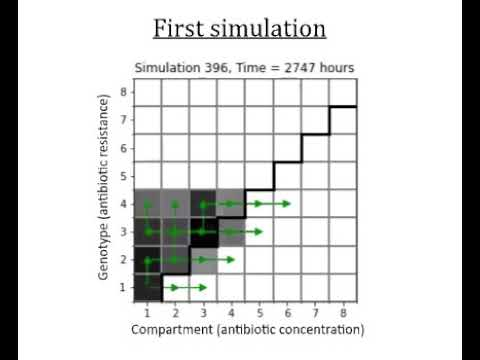

In [2]:
# First simulation
from IPython.display import YouTubeVideo
display(YouTubeVideo("3nPISSmkZv0"))

After 1000 simulations or 8300 elapsed hours (around one year), the initial bacteria population of 1000 with genotype 1 has acquired seven new genotypes and proliferated into new compartments, populating the entire 8 x 8 grid. During this time, there were some notable events.

During the first few seconds of the clip (before 1200 elapsed hours or seven weeks), bacteria with genotype 1 were migrating into compartments 2 and 3. Here, these bacteria quickly died, as they did not have the suitable genotypes to support their proliferation in these areas with greater antibiotic concentration. If they mutated forward to obtain the suitable genotype (once for compartment 2 and twice for compartment 3), they could proliferate. However, the model bacteria are 1 million times more likely to die than mutate forward.

Therefore, as soon as a bacterium acquires genotype 2 at seven weeks of simulated time, and an offspring arrives at compartment 2 one week later, bacteria can proliferate in this new compartment. As time continues, bacteria will proliferate where they can and may acquire new mutations that allow them to proliferate to a new compartment.

The staircase model shows the expansion of bacterial populations over time. It also shows that if they acquire resistance to antibiotics, they can grow in antibiotic-filled regions where they could not grow before. In this case, the bacteria populate the entire grid. Guided by the investigation of Hermsen et al. **[1]** and by interest in obtaining similar bacterial evolution results with this model adaptation, two parameters were varied: the destination of migration and the forward mutation rate.

### *Varying the migration destination*
The effect of changing the destination of migration from *neighbour-to-neighbour* to *all-to-all* is observed in the clip below. Similarly, run the code and click play. In the case of all-to-all migration, a bacterium can arrive at one compartment from any other. To still track pioneering bacteria, the index of the compartment of origin is used, instead of horizontal arrows, as arrows can overlap and make it difficult to determine where pioneering bacteria came from.

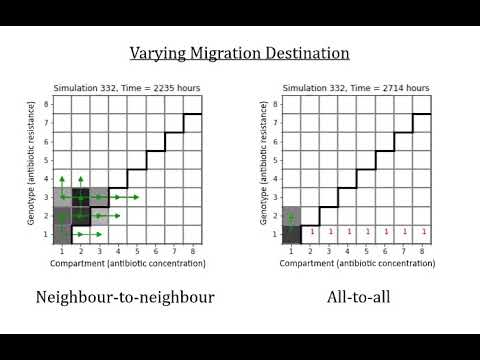

In [3]:
# Parameter varied: Migration destination
from IPython.display import YouTubeVideo
display(YouTubeVideo("U0TzKVq_aw8"))

The above two simulations were obtained independently. After 1000 time steps, the time elapsed is different between the simulations but close, between the two: 8300 and 8600 hours (both around one year). More notably, the bacterial population that underwent all-to-all migration did not exhibit extensive proliferation such as with neighbour-to-neighbour migration.

In the beginning, bacteria with genotype 1 are migrating to all other compartments between 2 and 8. There, they cannot proliferate due to sensitivity to the greater antibiotic concentration. Consequently, they die. If they could mutate forward before dying, they could survive. With this model, bacteria that migrate into high compartments must mutate forward several times more to survive. Each mutation is 1M less likely than death. At the first second of the clip (1 month), one bacterium acquired genotype 2, but it quickly dies after likely migration into a region where it cannot grow.

At around 4 months of the simulation (2800 hours), a new population with genotype 2 reemerges and persists until 4 months later when it dies out again. Afterward, a population with genotype 2 tries to reemerge several times, succeeding after 3.5 more months. On this occassion, the population also acquires genotype 3, and it extends to compartment 3 where it can grow, before the execution ends. Interestingly, the entire bacteria population did not die off; bacteria of genotype 1 persisted in compartment 1. This supported the reemergence of genotype 2 bacteria later in the simulation.

Between months 1 and 11, bacteria could not surpass genotype 2. Their further development of antibiotic resistance was largely controlled by all-to-all migration. This stunted development of resistance, relative to migrating neighbour-to-neighbour, arose due to the very high probability of migrating into non-proliferating regions for the starting bacteria of compartments 1 and 2. All migrating bacteria of compartment 1 will arrive in compartments with no proliferation. For bacteria of genotype 2, there are only 2 (out of 8) compartments in which they can grow ('safe havens'). Also, within any compartment, migration is 10,000 times more likely than forward mutation. Thus, many more genotype 2 bacteria will migrate and subsequently die than mutate forward. If they mutated forward, they would be able to proliferate in 3 regions out of 8. With few 'safe havens' for these bacteria and a high death rate due to frequent migration, genotype 2 populations do not reach large populations as with the case of neighbour-to-neighbour migration. As the model iterates through all bacteria in a compartment in each time step, there is a better chance of one mutating forward with more bacteria in one compartment. However, in these smaller genotype 2 populations, it is much less probable for one bacterium of mutating forward to overcome its high death rate due to migration. Therefore, the starting conditions for bacteria with all-to-all migration are much more hostile than with neighbour-to-neighbour migration, where more destination compartments are 'safe havens'.

These results suggest that if bacteria undergo a kind of migration that often leads them to non-proliferating regions, their development of antibiotic resistance could be slowed down and possibly controlled. This is an interesting idea, but it may not be realistic. While bacterial genomes may be modified such that bacteria are forced to pursue a specific unfavourable environment, doing this for the many bacteria worldwide could be very expensive. To reduce the workload, the genome-modifying vector could be programmed to be transmitted between bacteria, as bacteria already transmit favourable mutations. This is an interesting nanobiological problem, but it requires further investigation of its feasibility and utility before experimental work should be conducted.

### *Varying the forward mutation rate*
The effect of varying the forward mutation rate is investigated below. This is equivalent to bacteria obtaining an antibiotic resistance mutation at lower or higher rates. First, the case with neighbour-to-neighbour migration is considered, and then all-to-all migration. Note that three variants of forward mutation rate are considered. The original cases are leftmost, with rates of 1 in 10M cells per hour. Two higher rates of 1 in 100K cells per hour (centre, 100 times faster) and 1 in 1000 cells per hour (rightmost, 10K times faster). Also, the mutation rate μ is compared with the migration rate ν.

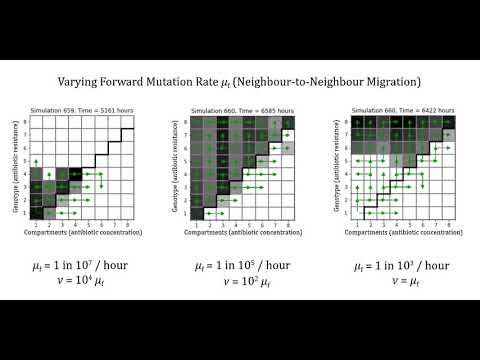

In [4]:
# Parameter varied: Forward mutation rate (neighbour-to-neighbour migration)
from IPython.display import YouTubeVideo
display(YouTubeVideo("TxPI_PKA1Gw"))

With a forward mutation rate of 1 in 1000 cells per hour (rightmost simulation), the bacteria populated the entire grid within 2 weeks. This is much faster than in the original case (leftmost), which took 1 year. Bacteria that can acquire resistance quickly can quickly adapt to an environment and proliferate in new areas where they could not before. Interestingly, by 2.5 months, bacteria of genotypes 5 to 8 begin to dominate the entire grid. As bacteria with low genotype numbers are prone to mutate forward, their population decreases until they have entirely disappeared. 

When the mutation rate is 1 in 100,000 (centre simulation), the bacteria populated the whole grid within 4 months. This is three times as fast as the original case. In this case, however, bacteria populations with low genotype numbers do not disappear. Here, these populations are more stable than in the rightmost case.

In addition, the bacterial population within one compartment appears to oscillate or cycle. This occurs due to the equation used for logistic growth. After one time step, very populous bacteria surpass the carrying capacity. In the next time step, proliferation within that compartment is zero. The second most likely action for bacteria, after proliferation, is death. As such, most bacteria in an overpopulated compartment die. This process is repeated as bacteria populations approach and surpass the carrying capacity.

Moreover, it is very interesting to observe that different proliferation dynamics arise due to varying the forward mutation rate. The rightmost case is a mathematical experiment, and the centre case may be extreme, as bacteria mainly have forward mutation rates between 1 in 100M to 1 in 1M cell per hour. Still, these simulations show that if bacteria had high mutation rates, they would be extremely dangerous. Therefore, it would be beneficial to study rapidly mutating bacteria to develop ways to stunt their mutation and prevent a possible outbreak.

In addition to these observations, there is another bifurcation that occurs with increasing the forward mutation rate.

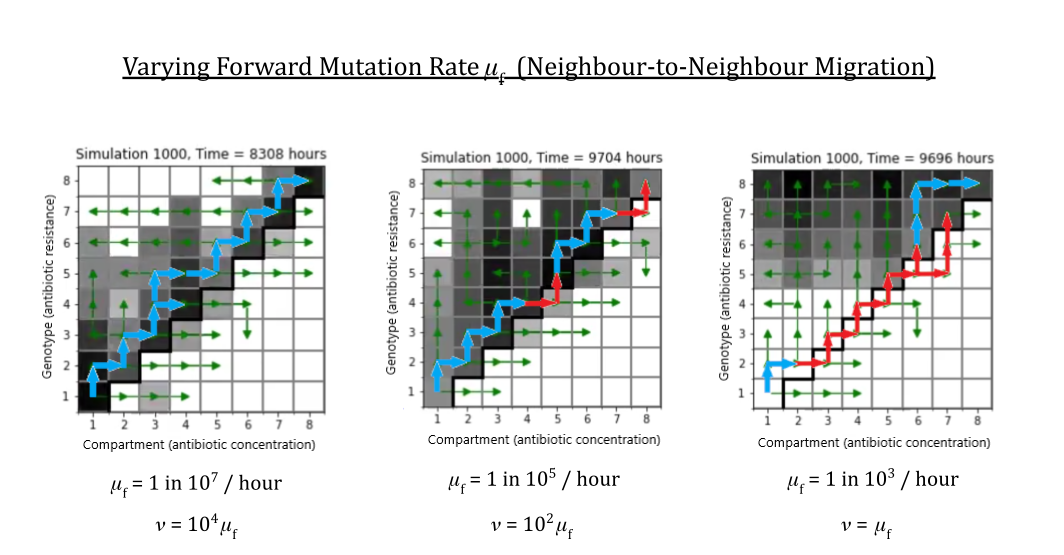

Above is the last frame of each simulation of the previous video. Blue and red arrows are used to highlight the paths that pioneering bacteria followed to arrive at a new compartment where proliferate is possible. The blue paths follow bacteria that first mutate and then migrate into a new compartment. On the other hand, the red paths follow bacteria that first migrate into non-proliferating compartments and then, fortunately, acquire the resistance needed to remain alive in that compartment. In the original case, no red paths are seen, or they are very rare. As the forward mutation rate increases, the blue paths become less frequent, and the red paths appear and start to dominate. In these cases, the migration rate is always more than or equally frequent as forward mutation. Thus, as the mutation rate approaches the migration rate, bacteria become more capable of mutating and surviving by chance before dying in a non-proliferating compartment. In addition, due to their extensive proliferation, as noted previously, bacteria with high mutation rates can overcome the limitations of their slowly mutating relatives. 

Moreover, the case of varying the forward mutation rate is considered for all-to-all migration below.

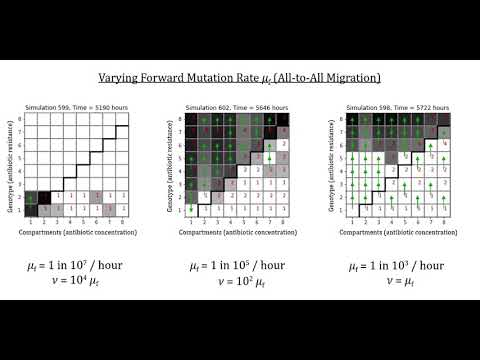

In [5]:
# Parameter varied: Forward mutation rate (all-to-all migration)
from IPython.display import YouTubeVideo
display(YouTubeVideo("tZM35JI7XMI"))

Similarly, here, for the rightmost case, the bacteria population filled the grid within 1 month. In the original case, it took 1 year for bacteria to acquire genotype 3, and for much of the time they could not surpass genotype 2. A very high mutation rate surmounted the limitation posed by all-to-all migration. Similarly, as with neighbour-to-neighbour migration, the most mutated bacteria (genotypes 5 to 8) dominated the environment by 2.5 months and are stable for the rest of the simulation. In the centre case, the grid was filled within 5 months, and all bacteria genotypes were stable for the rest of the time.

These experiments suggest that bacteria with high mutation rates could quickly adapt to overcome hostile environments. Their rapid development of resistance would allow them to surpass previous limitations on proliferation. For these bacteria, strains of specific, weaker genotypes may go extinct. Consequently, the antibiotic regimes, which would have been used to combat them, quickly become obsolete. Antibiotic drugs that took several years to a decade to produce are no longer useful within 1-2.5 months when facing such model bacteria.

### *Limitations of the study*
This study was limited by the number of individual simulations that were executed for each case considered. All individual grids were only obtained once. While a bacteria population that follows all-to-all migration may quickly die, given enough simulations, there may be a fortunate set that may, by chance, trump the limitations posed by this kind of migration. Still, given that the staircase model, being built on the kinetic Monte Carlo algorithm, is entirely probabilistic, the single simulations shown should represent the expected case.

Moreover, bacteria populations that surpassed the carrying capacity exhibited mass death in the next time step. This led to 100 thousand bacteria quickly becoming tens of bacteria in the next time step. This was an unexpected feature of our model adaptation, as the creators of the staircase model showed a smoother oscillation of bacteria populations (see .gif [here](https://www-pnas-org.tudelft.idm.oclc.org/highwire/filestream/609407/field_highwire_adjunct_files/0/SM01.gif)). Of course, this mass death of the bacterial populations is not entirely realistic, as with logistic growth, the population should oscillate around the carrying capacity.

# **Conclusion**
---


The aim of this project was to replicate the model by Hermsen et al. and apply it to investigate bacteria that are challenging world health. We have managed to write a model that replicated some of the results shown in the study by Hermsen et al. **[1]**. The model displays how bacterial populations grow in size over time, and if they obtain antibiotic resistance, they can expand to new drug-filled regions. Varying a few parameters in the model shows how bacteria could behave in different and relevant scenarios. Also, the danger posed by bacteria with high mutation rates is highlighted.

Through this project, we learned to execute kinetic Monte Carlo algorithm, program better with Python and produce video visualisations. This project helped us appreciate the importance of basing models on real parameters to obtain relevant results. Also, this project introduced us to the interesting and important topic of controlling antibiotic resistance.

# **Acknowledgements**
---
We have received helpful support from Dr. Mario Negrello and his TA, Rene. Mario introduced us to this model and challenged us to think about its intricacies and applications. Rene helped us optimise the code to reduce a 46-minute simulation into 4 minutes. Finally, we thank all our peers in the Nanobiology MSc for being inspiring.

# **References**
---
1. Hermsen, R., Deris, J.B. & Hwa, T. (2012) On the rapidity of antibiotic resistance evolution facilitated by a concentration gradient. *Proceedings of the National Academy of Sciences of the United States of America*. 109 (27), 10775-10780. https://doi-org.tudelft.idm.oclc.org/10.1073/pnas.1117716109.
2. Leetma, M. & Skorodumova, N.V. (2014) KMCLib: A general framework for lattice kinetic Monte Carlo (KMC) simulations. *Computer Physics Communications*. 185 (9), 2340-2349. https://doi.org/10.1016/j.cpc.2014.04.017.
3. Bathelt, J. (2016) *Adjusting gridlines and ticks in matplotlib imshow [Code] Stackoverflow*. https://stackoverflow.com/a/38994970. [Accessed 18th October 2021].
4. World Health Organisation (2021) *Cholera*. Available from: https://www.who.int/news-room/fact-sheets/detail/cholera [Accessed 23 October 2021].
5. U.S. Department of Health and Human Services: Centers for Disease Control and Prevention (2019) *Antibiotic Resistance threats in the United States*. Available from: https://www.cdc.gov/drugresistance/biggest-threats.html#acine [Accessed 23 October 2021].
6.  U.S. Department of Health and Human Services: Centers for Disease Control and Prevention (2019) *Drug-resistant *Neisseria Gonorrhoeae**. Available from: https://www.cdc.gov/drugresistance/biggest-threats.html [Accessed 13 October 2021].
7. Deris, J.B. (2013) The Innate Growth Bistability and Fitness Landscapes of Antibiotic-Resistant Bacteria. *Science*. 342(6162), 1237435. doi: 10.1126/science.1237435.
8. Makiela, D. & Maska, MM. (2016) Spontaneous Currents in a Bosonic Ring. *Acta Physica Polinica A*. 130, 569-572. DOI: 10.12693/APhysPolA.130.569.
9. Sharma, S.K. & Mohan, A. (2006) Multidrug-Resistant Tuberculosis: A Menace That Threatens To Destabilize Tuberculosis Control. *CHEST*. 130(1), 261-272. https://doi.org/10.1016/S0012-3692(15)50981-1
